# REPORTE 8

## Alexander Du-Bois Arana

## Código: 20200323

### Lectura

La lectura de Dell busca analizar cuál ha sido el impacto causal a largo plazo del sistema de trabajo forzado de la mita durante el Virreinato Español en el Perú. Se busca entender cuál es el impacto en la calidad de vida contemporánea de aquellos distritos que estuvieron relacionados en el pasado con esta red de trabajo, a comparación de aquellos donde no había mita. Por lo tanto, se busca comprobar o rechazar la hipótesis de que las instituciones históricas extractivas influyen en la prosperidad económica a largo plazo. Asimismo, la autora plantea la hipótesis de que la presencia de terratenientes en las zonas donde no hubo mita facilitó un sistema de tenendica de tierra estable que promovió la provisión de bienes públicos, mientras que en las zonas de la mita, al ser abolida la tenencia comunal, esto derivó en revueltas campesinas, y una administración en menor escala de las tierras, que los alejó de los bienes y servicios públicos hasta el día de hoy.

Una ventaja de esta investigación corresponde con su diseño metodológico, que hace uso de un enfoque de regresión discontinua para evaluar los efectos a largo plazo de la mita. Esto se hace ya que existiía una clara diferencia en los distritos donde había mita y donde no, ya que los primeros debían enviar a la séptima parte de su población masculina a trabajar, mientas que los demás distritos no. Y justamente esta diferenciación se divide en dos áreas territoriales, que pueden ser usadas por la regresión discontinua. Este tipo de diseño permite evidenciar los mecanismos causales por medio de un umbral, donde se toma como límite la región sometida a la mita, y se la compara con aquella que no fue sometida. Esto también permite controlar ciertos aspectos que podrían afectar a nuestras variables explicativas, como por ejemplo la altitud del territorio o la distribución étnica, que se mantienen estadísticamente idénticos dentro del límite territorial que plantea esta regresión discontinua.

Por otro lado, también se pueden identificar algunas debilidades de este enfoque de investigación. En primer lugar, el trabajo analiza el impacto de la mita a largo plazo, pero no se toman en cuenta las variaciones que se han tenido desde la independencia del Perú hasta el día de hoy en las localidades donde había mita. Es probable que el impacto de la mita se vea en mayor medida reflejado en la posterior relación del Estado Peruano con estas zonas, ya que la administración de las minas y de las tierras cambió con la construcción del Estado. Asimismo, considero que hace falta evaluar la variación interna entre aquellas zonas con mita, lo que podría evidenciar variaciones endógenas que explicarían los diferentes niveles de crecimiento entre las zonas que tenían mita. El trabajo analiza los efectos de la mita en la cordillera, pero creo que sería importante considerar las variaciones entre las localidades de cada uno de los grupos analizados.

En relación a la pregunta, el trabajo compara un listado de los distritos sometidos a la mita con los distritos modernos, haciendo uso de datos independientes de caidad de vida de la Encuesta Nacional de Hogares del Perú del 2001, así como del Ministerio de Educación. Para ello, se utiliza una regresión discontínua, donde se toma como grupo de control a los distritos que no tuvieron mita, y el grupo de tratamiento se compondría de aquellos distritos donde si hubo mita. El trabajo logra encontrar resultados significativos acerca de que el impacto de la mita genera que exista un retraso actual de crecimiento infantil, así como una disminución histórica del nivel educativo, y un menor nivel de integración a la red de carreteras. Asimismo, se puede observar que las haciendas se desarrollaron fuera de la zona de influencia de la mita, lo que ha generado que en las zonas de la mita haya prevalecido hasta hoy la agricultura de subsistencia y que el consumo doméstico de estos distritos que tenían mita sea 25% menor que los demás. Además, el trabajo logra contraargumentar el conocido argumento de que la desgualdad histórica en el acceso en la tierra es lo que ha causado el limitado crecimiento de América Latina. Por medio de esta investigación, se demuestra que los grandes terratenientes que no estaban en localidades relacionadas con la mita fueron atractivos para la clase trabajadores, ya que les ofrecián una coartada frenten a la explotación del Estado en la mita, lo que les garantizaba el acceso a bienes y servicios públicos.

Finalmente, este trabajo corresponde a un precedente para entender como las instituciones históricas nos permiten entender las condiciones desiguales de desarrollo en la actualidad. El autor propone que se debería investigar el papel del Estado en la economía a nivel histórico como un purto de partida interesante para entender las dinámicas de desigualdad que se perpetúan hasta el día de hoy. Asimismo, existen trabajos que han realizado esta evaluación de instituciones históricas en otro países. Por ejemplo, el trabajo de Robinson (2015) analiza las facetas extractivas de las instituciones políticas de Colombia desde los años 1850, y demuestra que estas se han tornado menos extractivas con el paso del tiempo, lo que ha generado modernización en el país, pero cuya pobreza y violencia persisten por causa de otros factores. Trabajos como este podrían usarse para realizar comparaciones con el Perú, u otros países con un pasado colonial. Esto es lo que Michalopoulos y Papaioannou (2013) realizan acerca del desarrollo contemporáneo de África, y logran evidenciar que la distribución étnica centralizada de la época colonial ha tenido un efecto en el desarrollo regional.

Bibliografía

- Dell, M. (2010). The persistent effects of Peru's mining mita. Econometrica, 78(6), 1863-1903.
- Michalopoulos, S., & Papaioannou, E. (2013). Pre‐colonial ethnic institutions and contemporary African development. Econometrica, 81(1), 113-152.
- Robinson, J. A. (2015). The misery in Colombia. Desarrollo y sociedad, (76), 9-90.

### Código

In [11]:
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns

In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


#### Instrumental Variables

El supuesto de relevancia y validez son las dos condiciones mínimas que se deben satisfacer para que una variable instrumental funcione correctamente.

Cuando hablamos de "relevancia" nos estamos refiriendo a que debe existir una relación mínima entre la variable de tratamiento X y la variable instrumental Z. Cuando usamos variables instrumentales, lo que buscamos es usar la parte de X que se explica por Z. Por lo tanto, la "relevancia" refiere a la condición indispensable de que Z efectivamente se relacione con X. Mientras más fuerte sea esta correlación, es decir mientras más se acerque a 1, entonces podemos tener más confianza de que esta relación permitirá que la variable instrumental funcione correctamente.

En cambio, cuando nos referimos a la "validez", nos referimos a que la variable instrumental Z debe ser una variable que no tenga puertas traseras propias. Esto quiere decir que no debe haber ningún otro camino que lleve a Z a afectar a Y, excepto el camino de X, que es nuestra variable de tratamiento. A la validez también podemos llamar la condición de "restricción de exclusión", en el sentido de que Z puede ser retirada del modelo de Y luego de haber construído el camino de Z a X. La idea de la "validez" es que la variable Z se encargue de cerrar algunas de las puertas traseras de X, y para ello la variable Z no debe tener puertas traseras de su parte. Por lo tanto, si nuestra variable Z es válida, todo mecanismo causal debe empezar por Z, lo que cierra las puertas de las demás variables que afectan a X dentro de ese modelo. Pero siempre resulta difícil identificar la validez de una variable instrumental, a menos que este represente una aleatoreidad real, o provenga de un entorno totalmente diferente al de la variable Y, pero que igual pueda relacionarse con X.

#### Ploteo de Histogramas

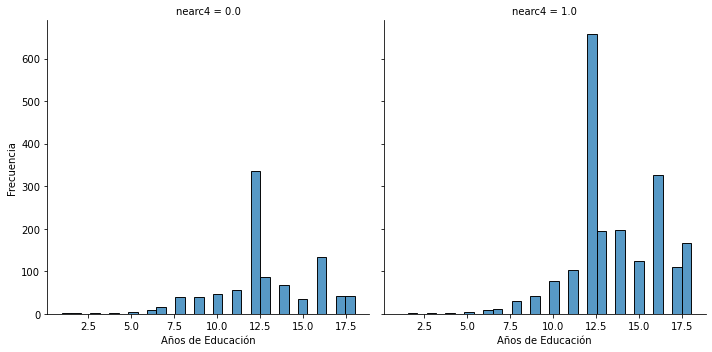

In [4]:
g = sns.displot(data=card, x="educ", col="nearc4", stat="count")
g.set(xlabel = "Años de Educación", ylabel = "Frecuencia")

Viendo ambos histogramas, se puede observar que la variable "vivir cerca a la universidad" afecta los años de educación de las personas. En general, se puede afirmar que vivir cerca a una universidad aumenta los años de educación en promedio que reciben los jóvenes de la investigación. El primer gráfico muestra el nivel de educación de jóvenes que no viven cerca a su universidad al ser la variable "nearc4" con categoría 0. Alrededor de 350 jóvenes llegaron a tener 12 años y medio de educación, y solo alrededor de 40 lograron alcanzar 17 años y medio de educación. En cambio, en el segundo gráfico, de aquellos jóvenes con universidades ubicadas cerca al lugar donde viven, se observa que los años de educación de muchos de ellos son más altos que los del primer gráfico. Aquí más de 600 jóvenes alcanzaron los 12 años y medio de educación, y alrededor de 200 llegaron a las 17 años y medio. Por lo tanto, vemos que existe un aumento de los años de educación al vivir cerca a una universidad. 

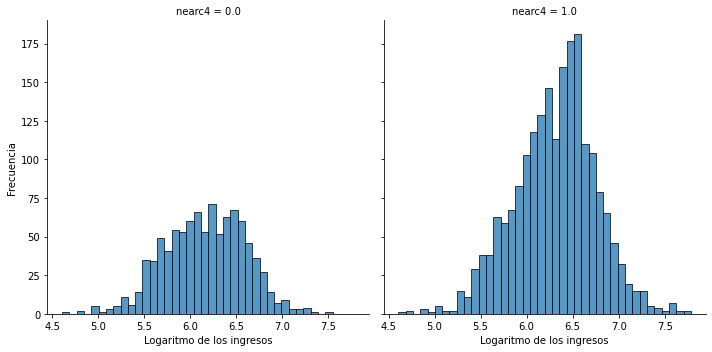

In [6]:
g = sns.displot(data=card, x="lwage", col="nearc4", stat="count")
g.set(xlabel = "Logaritmo de los ingresos", ylabel = "Frecuencia")

Ambos histogramas muestran la distribución de ingresos de las personas que viven cerca a una universidad y las que no. Sin embargo, no se ven diferencias significativas en el patrón, ya que se observa una distribución normal en ambos casos. Es verdad que en el gráfico 2 hay un poco más de concentración en las personas con logaritmo de ingresos 6.5 a 6.7, pero esto se debe a la cantidad de casos del grupo. En ambos gráficos, existen pocos personas con logaritmos de ingresos menos a 5 o mayores a 7, y la mayor concentración de estos logaritmos se encuentran entre 6 y 6.5 logaritmo de ingresos. Por lo tanto, no parece observarse una relación entre vivir cerca a una universidad y tener más o menos ingresos. Lo único que cambia es la cantidad de casos por grupo, donde el grupo de personas que viven en una universidad es mayor. Sin embargo, la distribución de los ingresos no cambia de manera significativa entre ambos gráficos.

#### Regresiones

In [13]:
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          1.97e-232
Time:                        17:18:06   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Esta regresión nos muestra un p value menor a 0.05, por lo que podemos decir que los resultados son significativos. En este caso, todas las variables tienen un efecto sobre los ingresos. Las variables "educ", "exper" y "smsa", con coeficientes de 0.07, 0.03 y 0.18 tienen un efecto positivo en el ingreso. Esto quiere decir que si aumenta en una unidad la variable educación o la variable experiencia, es decir, que aumentan en un año, entonces el logaritmo de ingresos aumentará en 0.07 o 0.03 respectivamente. En el caso de vivir en SMSA, si se cumple esta condición, entonces el logaritmo del ingreso aumentará en 0.18. Sin embargo, ser afroamericano, vivir en el sur, o estar casado, son variables que afectan negativamente al ingreso. Esto quiere decir que si eres afroamericano, vives en el sur de EEUU o estas casado, el logaritmo del ingreso va a disminuir en 0.17, 0.12 o 0.04 puntos respectivamente.

In [14]:
card['married'] = card['married'].fillna(0)

iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2 ]", card).fit()
iv_reg.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Fri, Nov 11 2022   P-value (F-stat)                0.0000
Time:                        17:18:11   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

A comparación de la regresión sin variables instrumentales, esta regresión ha generado que cambie el coeficiente de la variable "educ" cuando tomamos a la variable "nearc2", que significa vivir cerca a una universidad. Su p value es un poco mayor a 0.05, por lo que podríamos argumentar que no es un valor significativo. Sin embargo, igual podemos analizar estos resultados. En la primer regresión, el coeficiente de "educ" fue de 0.0712. Ahora, con la variable instrumental, el coeficiente de educ fue de 0.36, es decir, 5 veces mayor que cuando no instrumentalizamos a la variable. Esto quiere decir que cuando instrumentalizamos a la variable "educación", en este caso con la variable de "vivir cerca a una universidad", su capacidad de afectar a la variable "ingreso" aumenta considerablemente. Este cambio se debe claramente al efecto de la variable instrumental de cerrar las puertas traseras que afectaban a la variable de tratamiento "educación". Asimismo, podemos estar seguros de la fuerza de esta variable instrumental "nearc2" por el F statistic, que es mucho mayor que 15. En resumen, ahora podemos decir que cuando asociamos la educación con la cercanía de una universidad, por cada año extra de educación, el logaritmo de ingresos aumentará en 0.36, o 36%.